# Clickbait or Not?

The main goal of this project is to classify, using Natural Language Processing, the titles that are considered clickbait

### 1 Preprocessing

#### 1.1 Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 1.2 Reading the datasets

In [2]:
click_bait = pd.read_csv('clickbait_titles.csv')
serious_titles = pd.read_csv('non_clickbait_titles.csv')

#### 1.3 Adding the labels
---------------------------
#####       1 for clickbait titles
#####       0 for serious titles

In [3]:
click_bait['label'] = 1
serious_titles['label'] = 0

####  1.4 Removing useless columns

In [4]:
click_bait = click_bait[['title', 'label']]
serious_titles = serious_titles[['title', 'label']]

In [5]:
display(click_bait.head())
display(serious_titles.head())

,title,label
0,"20 imagens que, por incrível que pareça, não s...",1
1,24 filmes da Disney explicados por homens que ...,1
2,Todo mundo é uma princesa da Disney OU um heró...,1
3,Quais são as três comidas que combinam com a s...,1
4,Este teste sobre comida vai dizer de uma vez p...,1


,title,label
0,Nem todos que assinam manifesto pró-Boulos dec...,0
1,Centenas de professores universitários não est...,0
2,Janaina Paschoal diz que ser vice de Bolsonaro...,0
3,Russomanno vira sócio de startup financeira qu...,0
4,"Governo errou na política para combustíveis, d...",0


In [6]:
print('Itens {Clickbait}: ', click_bait.shape[0])
print('Itens {Serious Title}: ', serious_titles.shape[0])

Itens {Clickbait}:  1307
Itens {Serious Title}:  1033


#### 1.5 Concatenating both datasets in one

In [7]:
titles = pd.concat([click_bait, serious_titles], axis = 0, ignore_index = True)
titles.to_csv('clickbait_or_not.csv', encoding = 'utf-8')

In [8]:
titles.shape

(2340, 2)

#### 1.6 Defining the feature and the label variables

In [9]:
X = titles['title']
y = titles['label']

#### 1.7 Transforming the feature in a token count matrix

In [10]:
cv = CountVectorizer()

X = cv.fit_transform(X)

#### 1.8 Splitting the dataset into train and test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [12]:
print('tamanho do X_train: ', X_train.shape, '\t', 'tamanho do y_train: ', y_train.shape)
print('---------------------------------------------------------------------------')
print('tamanho do X_test: ', X_test.shape, '\t', 'tamanho do y_test: ', y_test.shape)

tamanho do X_train:  (1755, 5651) 	 tamanho do y_train:  (1755,)
---------------------------------------------------------------------------
tamanho do X_test:  (585, 5651) 	 tamanho do y_test:  (585,)


### 2 Creating the models

#### 2.1 Assigning the models

In [13]:
multinomial_clf = MultinomialNB(alpha = 1)
complement_clf = ComplementNB(alpha = 1)
svm_clf = svm.SVC(kernel = 'linear', C = 1.0)

#### 2.2 Training the models

In [14]:
multinomial_clf.fit(X_train, y_train)
complement_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### 2.3 Predicting the test points

In [15]:
pred_mult = multinomial_clf.predict(X_test)
pred_complement = complement_clf.predict(X_test)
pred_svm = svm_clf.predict(X_test)

### 3 Checking the precision of each model

#### 3.1  _F1 Score_

In [16]:
print('MultinomialNB Score:', str(round(f1_score(pred_mult, y_test), 4) * 100)+'%')
print('ComplementNB Score:', str(round(f1_score(pred_complement, y_test), 4) * 100)+'%')
print('SVM Score:', str(round(f1_score(pred_svm, y_test), 4) * 100)+'%')

MultinomialNB Score: 97.33000000000001%
ComplementNB Score: 97.00999999999999%
SVM Score: 94.88%


#### 3.2  _Confusion Matrix_

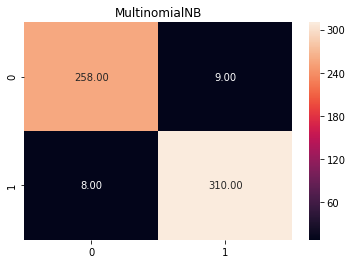

In [17]:
sns.heatmap(confusion_matrix(y_test, pred_mult), annot = True, fmt = '.2f')
plt.title('MultinomialNB')
plt.show()

#### 3.3 _Precision/Recall/F1 Score_

In [18]:
print(classification_report(y_test, pred_mult, digits = 3))

              precision    recall  f1-score   support

           0      0.970     0.966     0.968       267
           1      0.972     0.975     0.973       318

   micro avg      0.971     0.971     0.971       585
   macro avg      0.971     0.971     0.971       585
weighted avg      0.971     0.971     0.971       585



#### 3.4 _Accuracy Score_

In [19]:
print('Accuracy Score:', accuracy_score(y_test, pred_mult), )

Accuracy Score: 0.9709401709401709


#### 3.5 _ROC/AUC_

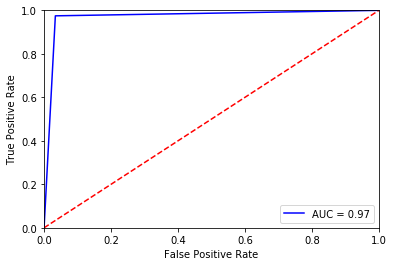

In [20]:
fpr, tpr, treshold = roc_curve(y_test, pred_mult)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 4 Validating with recent titles

In [21]:
val = cv.transform(['Escolha um ídolo do k-pop e nós indicaremos seu produto de beleza ideal',
        'Senador gay coloca Augusto Aras contra a parede: "Tenho subfamília? Sou doente?"',
        'Suas opiniões sobre estas tendências atuais da moda vão nos dizer se você faz parte da geração millennial ou da geração Z',
        '“Outras Ágathas virão”, diz oposição sobre pacote de Moro',
        'Planeje sua invasão à Área 51 e descubra qual E.T. você vai encontrar por lá',
        '10 livros com cartas de amor de gente meio passional',
        '“Recomendo que procure ajuda psiquiátrica”, diz Gilmar Mendes sobre Janot',
        'O pior é ter que concordar com o Gilmar, dizem aliados que romperam com Janot',
        'Cheesecake nunca é demais!',
        'O Facebook confirmou que políticos podem publicar o que quiserem, seja falso ou não'])

val_y = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]

In [22]:
val_pred = multinomial_clf.predict(val)
val_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [23]:
print('Validation Score: ', str(round(f1_score(val_pred, val_y)) * 100)+'%')

Validation Score:  100.0%


### 5 Model persistance

#### 5.1 Saving the model

In [24]:
save = joblib.dump(multinomial_clf, 'Naive Bayes Buzzfeed Classifier.pkl')

#### 5.2 Loading the model

In [25]:
loaded_model = joblib.load('Naive Bayes Buzzfeed Classifier.pkl')

#### 5.3 Predicting with the loaded model

In [26]:
loaded_model.predict(val)

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])